# 중간고사 대비

- toc:true
- branch: master
- badges: true
- comments: true
- editor : 이강철
- hide : false
- published : true

## 1주차 : 단순선형회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 온도에 따른 아메리카노 판매량

$$아이스 아메리카노  = \beta_1 \times 온도 + \varepsilon$$

`-` 온도 $\bf{x}$를 아래와 같이 생성

In [ ]:
x = tf.constant([20.1,22.2,22.7,23.3,24.4,25.1,26.2,27.3,28.4,30.4])
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4],
      dtype=float32)>

`-` 가정 : 만약 아메리카노 판매량 $\bf{y}$가 아래와 같다고 하자

$$ \bf {y} \approx 10.2 + 2.2 \bf{x}$$

In [ ]:
tf.random.set_seed(202150256)

epsilon = tf.random.normal([10])
y = 10.2 + 2.2*x + epsilon
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.728127, 57.886845, 59.39006 , 63.192116, 63.904133, 63.547157,
       68.00105 , 70.056755, 72.11336 , 78.33952 ], dtype=float32)>

`-` 일상적인 데이터 형식에서 다음과 같이 자료를 모은 셈이다 

In [ ]:
tf.transpose(tf.concat([[x],[y]],0))

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[20.1     , 53.728127],
       [22.2     , 57.886845],
       [22.7     , 59.39006 ],
       [23.3     , 63.192116],
       [24.4     , 63.904133],
       [25.1     , 63.547157],
       [26.2     , 68.00105 ],
       [27.3     , 70.056755],
       [28.4     , 72.11336 ],
       [30.4     , 78.33952 ]], dtype=float32)>

### 도식화 

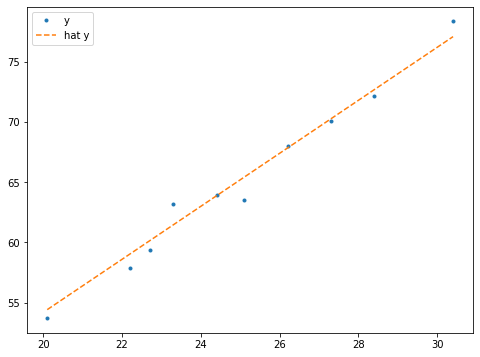

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(x,y,".",label="y")
plt.plot(x,10.2+2.2*x,"--",label ="hat y")
plt.legend()

### 목표

$$loss = \sum (y - \hat {y})^2 $$

* `loss`를 최소화 하는 것이 우리의 목표이다.

* 일일이 $\beta_i$의 값을 집어넣으면 `loss`를 최소화하는 $\beta_i$를 구할 수 있지만 사실상 무한번 저 과정을 반복하는 것은 불가능하다.

* 따라서 위를 각각의 $\beta_i$로 미분하면 다음과 같이 구할 수 있다.

$$\hat {\beta_1} = \frac {S_{xy}}{S_{xx}}  = \frac {\sum (x-\bar x)(y-\bar y)}{\sum {(x-\bar x)^2}}$$

$$\hat {\beta_0} =  \bar y - \hat {\beta_1}\bar x $$

In [ ]:
import numpy as np

In [ ]:
Sxx = sum((x- np.mean(x))**2)
Sxy = sum((x-np.mean(x))*(y-np.mean(y)))

In [ ]:
hat_b1 = Sxy/Sxx
hat_b0 = np.mean(y) - hat_b1*np.mean(x)

In [ ]:
hat_b1,hat_b0

(<tf.Tensor: shape=(), dtype=float32, numpy=2.311769>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.198574>)

`-` 위의 그래프와 비교해보자

* $y$ : 실제 값
* $\hat {y_1}$ : 우리가 일전에 가정한 것(세상의 법칡)
* $\hat {y_2}$ : 미분으로 구한 베타 추정치

$$\hat {y_1} = 10.2 + 2.2 x$$

$$\hat  {y_2} = \hat {\beta_{0,2}} + \hat {\beta_{1,2}} \times x $$

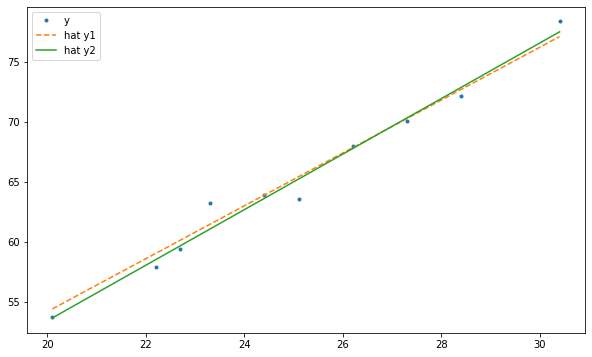

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(x, y,".", label = "y")
plt.plot(x, 10.2+2.2*x,"--", label = "hat y1")
plt.plot(x, hat_b1*x + hat_b0, label = "hat y2")
plt.legend()

*  여튼 미분을 통해서 $\beta_i$를 추정한다는 것은 수학적 관점에서 꽤나 훌륭한 방법인 것 같다.

* 그러나 만약 $x_i,i = 1,2,\dots 10009$  이런식으로 무수히 많은 변수가 존재할 경우 확장이 어렵고 \beta_i 를 추정하는데 어마어마한 시간이 걸릴 것임

* 이를 행렬구조로 바꾸어서 생각해보자

$$ \bf {y} = \bf {x} \boldsymbol{\beta} + \boldsymbol{\varepsilon}$$

* $\bf {y} \to (n\times 1)$

* $\bf {x} \to  (n \times p), \quad \boldsymbol {\beta} \to (\bf p \times 1), \quad \therefore \quad \bf {x} \boldsymbol{\beta} \to (n \times 1)$

* $\boldsymbol {\varepsilon} \to (\bf n \times 1)$

$$loss = \sum (y- \hat y)^2 = (\bf y - \bf X \boldsymbol {\beta} )^{\top}(\bf y - \bf X \boldsymbol {\beta} ) $$

위를 풀면

$$loss = \bf y^{\top}y - \bf y^{\top}\bf X \boldsymbol{\beta}  -\boldsymbol {\beta}^{\top} \bf {X}^{\top}y + \boldsymbol {\beta}^{\top}\bf{X}^{\top}\bf X \boldsymbol {\beta}$$

위를 미분하여  $loss$를 최소화하는 $\hat {\boldsymbol {\beta}}$를 구하면

$$\hat {\boldsymbol {\beta}} = (\bf {X^{\top} X})^{-1} \bf X^{\top} \bf y$$ 

`-` 이제 직접 코드를 짜서 $loss$를 최소화하는 $\hat {\boldsymbol{\beta}}$를 구해보자

#### 매트릭스를 이용한 베타 추정치 구하기

In [139]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior() ## numpy 처럼 사용하기 위해!

In [144]:
x = tf.constant([20.1,22.2,22.7,23.3,24.4,25.1,26.2,27.3,28.4,30.4])
epsilon = tf.random.normal([10])
y = 10.2 + 2.2*x + epsilon
n = len(x)

In [145]:
X = tf.concat([[[1.0]*n],[x]],0).T

In [146]:
X

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1. , 20.1],
       [ 1. , 22.2],
       [ 1. , 22.7],
       [ 1. , 23.3],
       [ 1. , 24.4],
       [ 1. , 25.1],
       [ 1. , 26.2],
       [ 1. , 27.3],
       [ 1. , 28.4],
       [ 1. , 30.4]], dtype=float32)>

In [148]:
print(tf.linalg.inv(X.T @ X) @ X.T @ y)

tf.Tensor([9.045627  2.2322702], shape=(2,), dtype=float32)


* 값이 좀 다르긴 한데 이는 텐서플로우가 계산을 대충하는 것임

* 실제로 정확한 계산을 위해  `tensorflow` 안에 내장된 `nummpy`를 이용하자

#### tensorflow의 정확한 계산을 위해!

In [149]:
import tensorflow.experimental.numpy as tnp

In [150]:
x = tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])
y = 10.2 + 2.2 *x +epsilon

In [154]:
Sxx = sum((x-np.mean(x))**2)
Sxy = sum((x-np.mean(x))* (y-np.mean(y)))
beta1 =  Sxy/Sxx
beta0 = np.mean(y) - beta1*np.mean(x)

In [155]:
[beta0,beta1]

[<tf.Tensor: shape=(), dtype=float64, numpy=9.045680157770313>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2.2322740618055756>]

In [162]:
X = tnp.concatenate([[[1.0]*n],[x]]).T
tf.linalg.inv(X.T @ X) @ X.T @ y

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([9.04568016, 2.23227406])>